#### Filtro Pasa Bajos Chevy normalizado

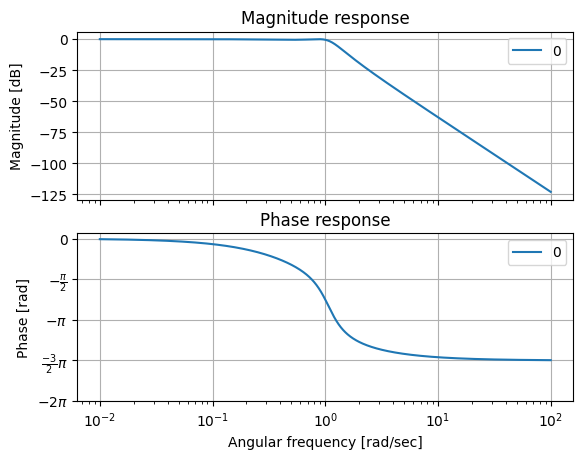

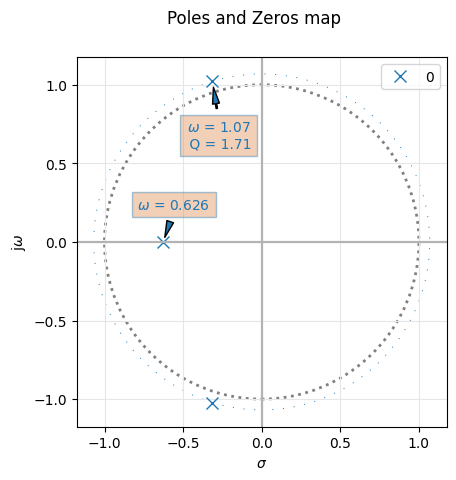

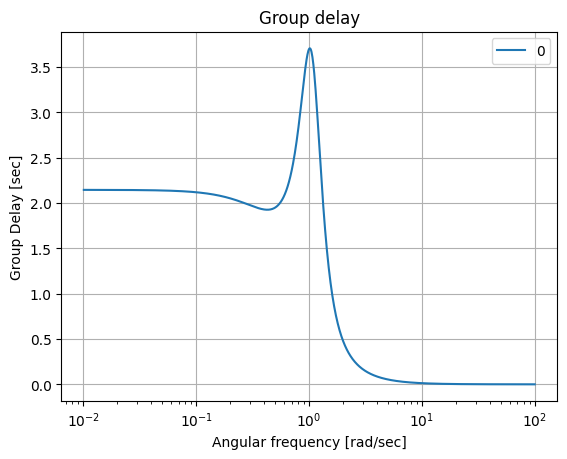

In [27]:
import sympy as sp
from sympy.abc import s

# Módulos externos
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
from pytc2.sistemas_lineales import pzmap, bodePlot, tf2sos_analog, analyze_sys, parametrize_sos, pretty_print_lti, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from pytc2.general import print_subtitle

n = 3
r = 0.5   ## Atenuacion en dB

fs1 = 17*10**3
fs2 = 36*10**3

fo = 22*10**3
wo = 2*np.pi*fo
q = 5
bw = wo/q

## Pasa bajos
lpb, lpa = signal.cheby1(n, r,1,analog=True)

tflp = signal.TransferFunction(lpb,lpa)
#pzmap(tflp, fig_id=1) #S plane pole/zero plot
#bodePlot(tflp, fig_id=2)
analyze_sys(tflp)
print_subtitle('Filtro Pasa Bajos Chevy normalizado')

#### Filtro Pasa Bajos Chevy normalizado (Acercamiento a la zona ondulada)

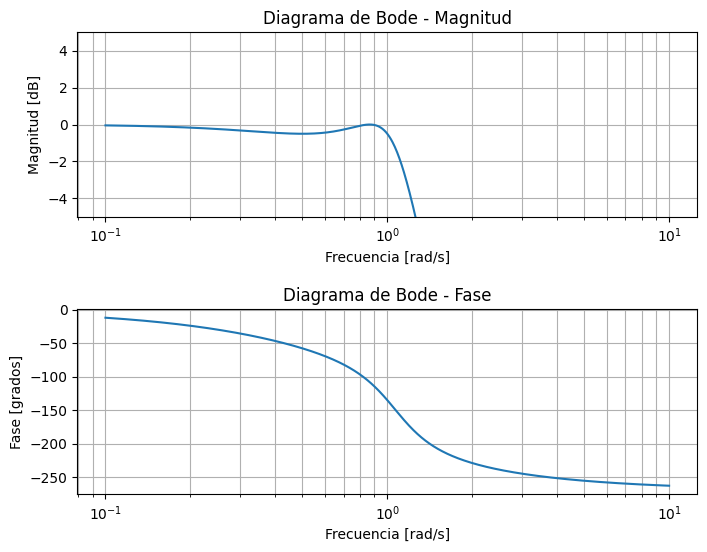

TransferFunctionContinuous(
array([0.71569379]),
array([1.        , 1.25291297, 1.53489546, 0.71569379]),
dt: None
)


In [26]:
print_subtitle('Filtro Pasa Bajos Chevy normalizado (Acercamiento a la zona ondulada)')

#--------------------------------------------------------------
# Generar el grillado de frecuencias

# Crear un vector de frecuencias con mayor resolución
w = np.logspace(-1, 1, num=1000)  # Rango de 10^4 a 10^6 con 1000 puntos

# Calcular la respuesta en frecuencia del sistema
w, mag, phase = signal.bode(tflp, w)

# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
fig.subplots_adjust(hspace=0.5)

# Graficar la magnitud en dB con grillado
ax1.semilogx(w, mag)
ax1.set_xscale('log')
ax1.set_xlabel('Frecuencia [rad/s]')
ax1.set_ylabel('Magnitud [dB]')
ax1.set_title('Diagrama de Bode - Magnitud')
ax1.grid(True, which="both")

# Ajustar límites del eje y
ax1.set_ylim(-5,5)

# Graficar la fase en grados con grillado
ax2.semilogx(w, phase)
ax2.set_xscale('log')
ax2.set_xlabel('Frecuencia [rad/s]')
ax2.set_ylabel('Fase [grados]')
ax2.set_title('Diagrama de Bode - Fase')
ax2.grid(True, which="both")

# Mostrar la figura
plt.show()
print(tflp)

## Trasnferencia de filtro pasa bajos Chevy:
$|T(s)|² = \frac{-\frac{1}{\epsilon².16}}{s⁶+1.5.s⁴+0.5625.s²-\frac{1}{\epsilon².16}}$  
  
### Obterngo los polos:
Considero a $x = s²$ para poder resolver el polinomio:  
$x³+1.5.x²+0.5625.x-\frac{1}{\epsilon².16} = 0$  
$x_1 = 0.3924  ;  x_2 = 1.14.e^{i.2.54}  ;  x_3 = 1.14.e^{-i.2.54}$  
  
Quedando los polos en:  
$s_1 = 0.626  ;  s_2 = -0.626  ;  s_3 = 1.06.e^{i.1.27}  ;  s_4 = -1.06.e^{i.1.27}  ;  s_5 = 1.06.e^{-i.1.27}  ;  s_5 = 1.06.e^{-i.1.27}$    
  
Nosotros nos quedaremos con los primeros 3 polos que son los que se encuentran en el lado izquierdo del plano z. Quedando la trasferencia de la siguiente manera:  
$T(s) = \frac{1}{s+0.626}.\frac{(\epsilon².16)^{-1/2}}{s²+0.5925.s+1.1236}$  
$T(s) = \frac{1}{s+0.626}.\frac{0.71574}{s²+0.5925.s+1.1236} = \frac{0.71574}{s³+1.2529.s²+1.5389.s+0.7156}$  



#### Filtro Pasa Banda Chevy desnormalizado

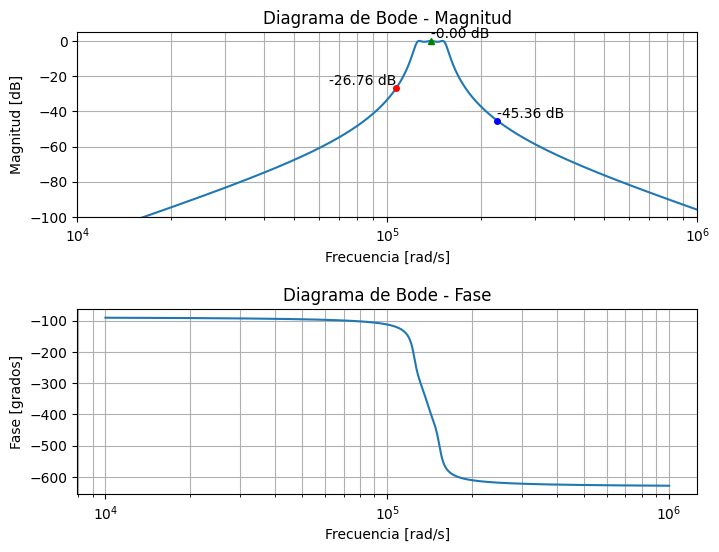

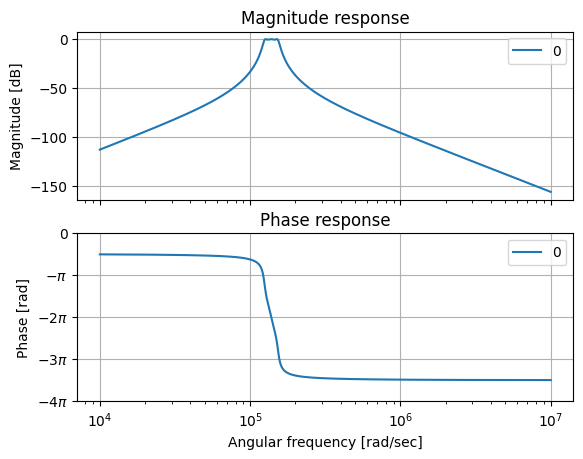

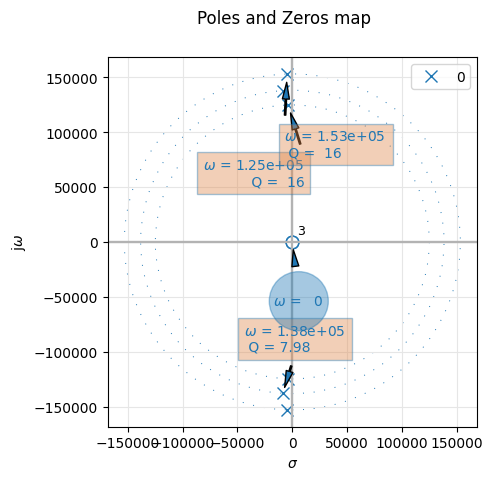

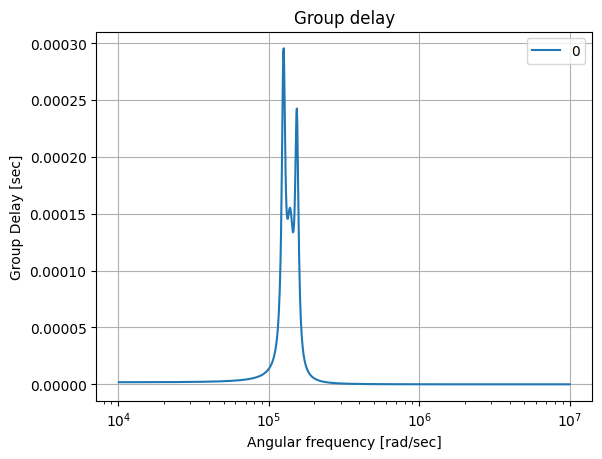

In [30]:
print_subtitle('Filtro Pasa Banda Chevy desnormalizado')
## Pasa banda
bpb, bpa = signal.lp2bp(lpb,lpa,wo,bw)

tfbp = signal.TransferFunction(bpb,bpa)
#pzmap(tfbp, fig_id=2) #S plane pole/zero plot


#--------------------------------------------------------------
# Generar el grillado de frecuencias

# Crear un vector de frecuencias con mayor resolución
w = np.logspace(4, 6, num=1000)  # Rango de 10^4 a 10^6 con 1000 puntos

# Calcular la respuesta en frecuencia del sistema
w, mag, phase = signal.bode(tfbp, w)

# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
fig.subplots_adjust(hspace=0.5)

# Graficar la magnitud en dB con grillado
ax1.semilogx(w, mag)
ax1.set_xscale('log')
ax1.set_xlabel('Frecuencia [rad/s]')
ax1.set_ylabel('Magnitud [dB]')
ax1.set_title('Diagrama de Bode - Magnitud')
ax1.grid(True, which="both")

# Marcar fs1
idx_1 = np.where(w >= (2*np.pi*fs1))[0][0]
mag_marker_1 = mag[idx_1]
ax1.plot(w[idx_1], mag[idx_1], 'ro', markersize=4)
ax1.text(w[idx_1], mag[idx_1], f'{mag_marker_1:.2f} dB', ha='right', va='bottom')

# Marcar fs2
idx_2 = np.where(w >= (2*np.pi*fs2))[0][0]
mag_marker_2 = mag[idx_2]
ax1.plot(w[idx_2], mag[idx_2], 'bo', markersize=4)
ax1.text(w[idx_2], mag[idx_2], f'{mag_marker_2:.2f} dB', ha='left', va='bottom')

# Marcar fo
idx_3 = np.where(w >= (2*np.pi*fo))[0][0]
mag_marker_3 = mag[idx_3]
ax1.plot(w[idx_3], mag[idx_3], 'g^', markersize=4)
ax1.text(w[idx_3], mag[idx_3], f'{mag_marker_3:.2f} dB', ha='left', va='bottom')

# Ajustar límites del eje x
ax1.set_xlim(10**4, 10**6)

# Ajustar límites del eje y
ax1.set_ylim(-100,5)

# Graficar la fase en grados con grillado
ax2.semilogx(w, phase)
ax2.set_xscale('log')
ax2.set_xlabel('Frecuencia [rad/s]')
ax2.set_ylabel('Fase [grados]')
ax2.set_title('Diagrama de Bode - Fase')
ax2.grid(True, which="both")

# Mostrar la figura
plt.show()

analyze_sys(tfbp)

## Transferencias pasa banda:
Para obtener la trasnferencia de un filtro pasa banda de orden 6 vamos a utilizar los datos obtenidos por la funcion analyze_sys() la cual en uno de sus graficos nos permite conoscer los coeficientes $q$ y $w$ de cada par de polos. Haciendo posible su reconstruccion atraves de 3 trasferencias de orden 2°.  
$T(s) = \frac{\frac{w}{q}.s}{s²+\frac{w}{q}.s+w²}$  
  
$T_1(s) = \frac{7.81.10³.s}{s²+7.81.10³.s+1.56.10^{10}}$  
$T_2(s) = \frac{9.56.10³.s}{s²+9.56.10³.s+2.34.10^{10}}$  
$T_3(s) = \frac{17.29.10³.s}{s²+17.29.10³.s+1.90.10^{10}}$  
  
$T(s) = T_1(s).T_2(s).T_3(s)$  

### Transferencias normalizadas:
$w_o = 2.\pi.22.10³ = 1.38.10⁵s^{-1}$  

$T_{1n}(s) = \frac{0.056.s}{s²+0.056.s+0.819}$  
$T_{2n}(s) = \frac{0.069.s}{s²+0.069.s+1.228}$  
$T_{3n}(s) = \frac{0.125.s}{s²+0.125.s+0.997}$  


## Activar las redes pasivas:
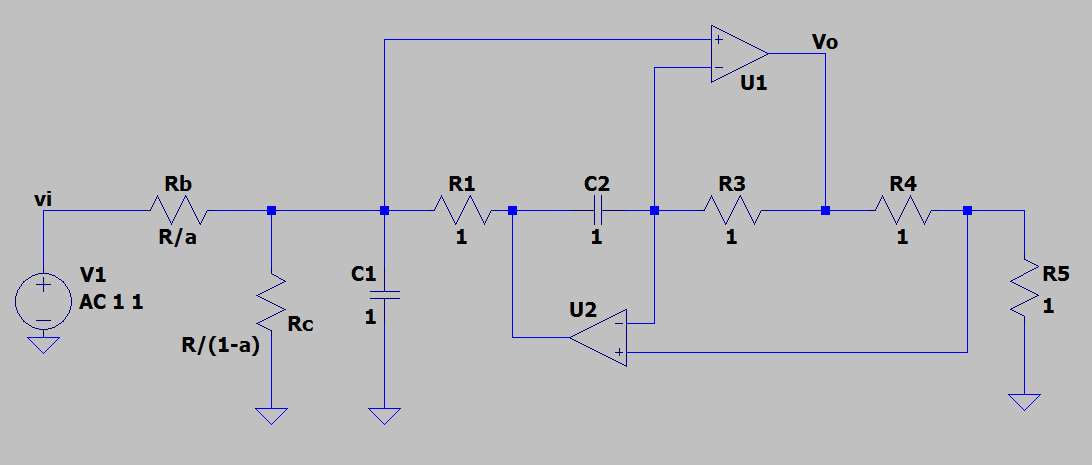
  
$T(s) = \frac{s.\frac{2.a}{R.C}}{s²+s.\frac{1}{R.C}+\frac{1}{C².R_{gic}²}}$  
  
Para que la trasferencia del filtro acrtivo sea igual a la del filtro pasivo la amplificacion por la banda de paso tiene que ser $1$, por lo tanto $a$ debe ser $\frac{1}{2}$. Ademas de esta concideracion debemos colocar los filtros en cascada y dado que la salida del circuito es un la salida de un opamp no es necesario utilizar un buffer para el colocamiento en cascada.

### Eleccion de componentes:
Concideramos a todos los capacitores con igual capacidad y todas las resistencias dentro de cada gic del mismo valor.

#### Normalizados:
$C = 1F$  
$R_b = R_c  \Rightarrow$ esto es necesario para que $a = 1/2$  
$R_{b1} = 16 \Omega$  
$R_{b2} = 30 \Omega$  
$R_{b3} = 35 \Omega$  
$R_{gic1} = 1 \Omega$  
$R_{gic2} = 0.903 \Omega$  
$R_{gic3} = 1.107 \Omega$  





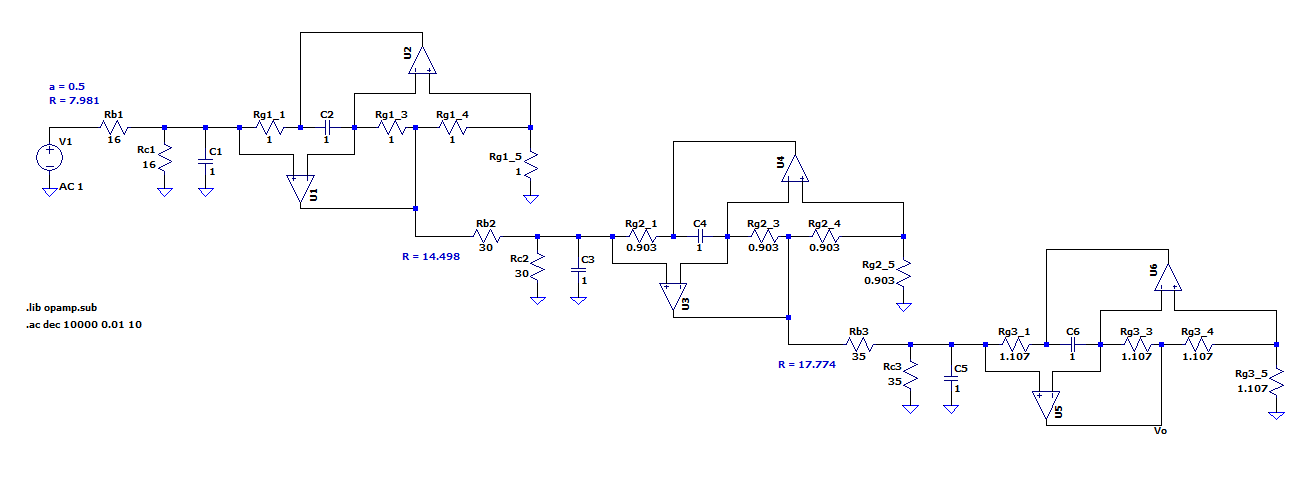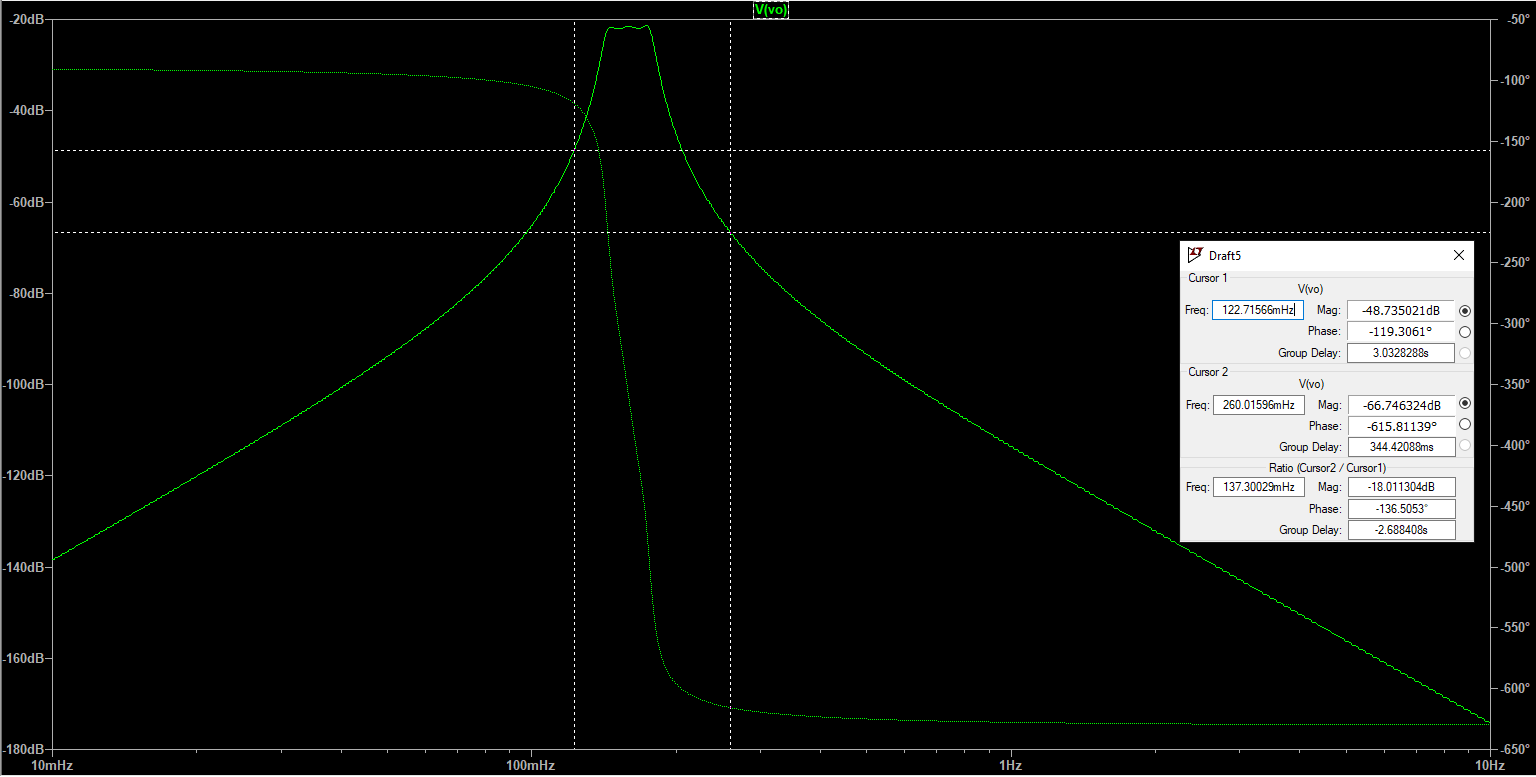

#### Desnormalizados:
$C = 72.34 nF$  
$R_b = R_c  \Rightarrow$ esto es necesario para que $a = 1/2$  
$R_{b1} = 16k \Omega$  
$R_{b2} = 30k \Omega$  
$R_{b3} = 35k \Omega$  
$R_{gic1} = 1k \Omega$  
$R_{gic2} = 903 \Omega$  
$R_{gic3} = 1.107k \Omega$  

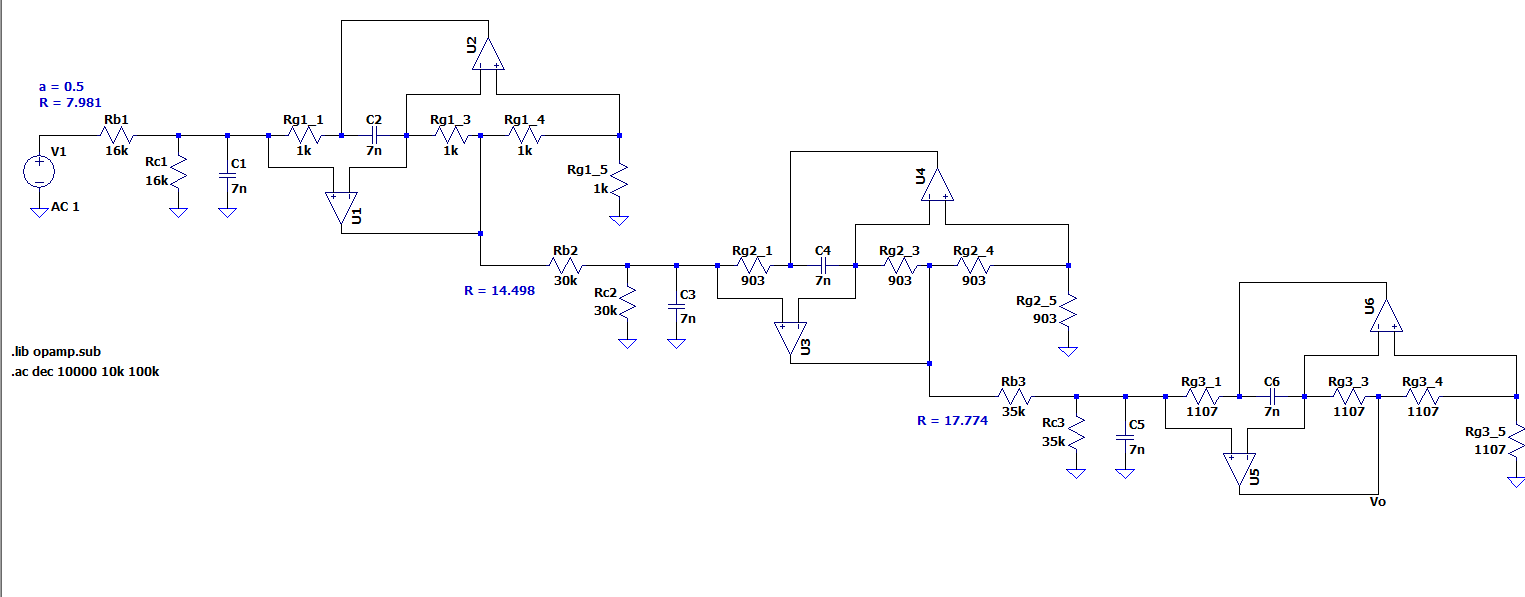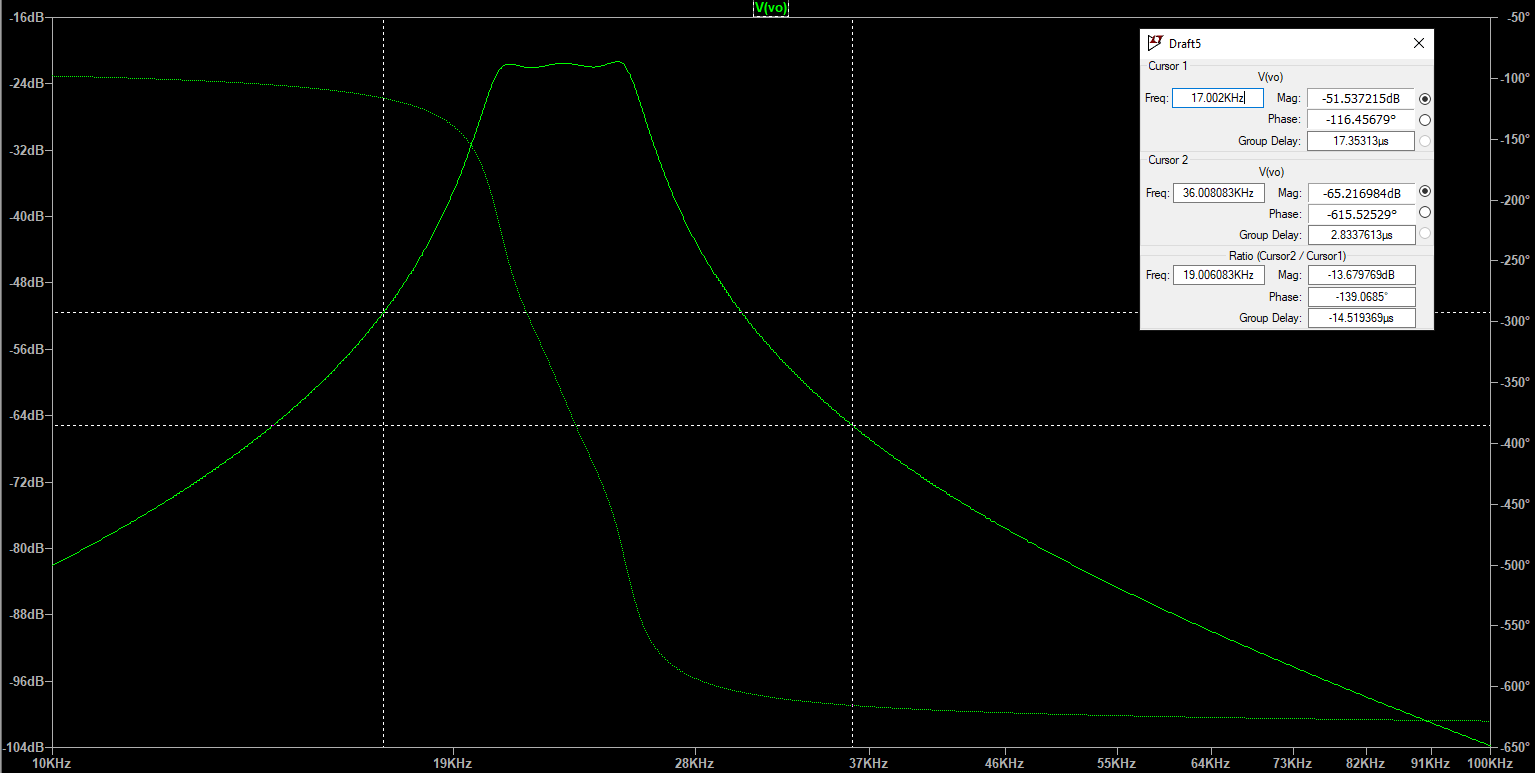